In [1]:
# COVID-19 Classification using CNN:
# - In this Python script, we leverage a Convolutional Neural Network (CNN) to classify chest X-ray or CT scan images into three categories: Covid, Normal, and Viral Pneumonia.

# Steps in the process:
# 1. Dataset Collection: Gather a dataset of chest images, categorized into Covid, Normal, and Viral Pneumonia cases.

# 2. Model Architecture: Design a CNN model that includes convolutional layers for feature extraction, pooling layers for downsampling, fully connected layers for classification, and ReLU activation for non-linearity.

# 3. Data Preprocessing: Preprocess the images by resizing them, normalizing pixel values, and possibly augmenting the dataset for increased diversity.

# 4. Data Splitting: Split the dataset into training and testing sets to evaluate the model's performance.

# 5. Label Encoding: One-hot encode the class labels, representing each category as a binary vector.

# 6. Model Training: Train the CNN model on the training data, monitoring its performance on the testing data. Performance metrics like accuracy, precision, recall, and F1-score are used for evaluation.

# 7. Validation: Ensure the model's performance with real-world medical data to verify its accuracy, effectiveness, and safety.

# The application of CNNs for COVID-19 classification is significant in early detection and diagnosis, especially in cases with limited medical resources. It also serves as a valuable tool for research, analysis, and decision support in the medical field.


### 1. Importing Required libraries

In [2]:
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Dropout,Conv2D,InputLayer
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

### 2. Import the train and test datasets

In [3]:
# Define the directory path for the training data.
train_dir = "Covid19-dataset/train/"

# Define the directory path for the testing data.
test_dir = "Covid19-dataset/test/"


In [4]:
# Define the categories (classes) your model will classify data into.
categories = ['Covid', 'Normal', 'Viral Pneumonia']

# Initialize empty lists for storing your data and labels.
y = []  # Combined labels
x = []  # Combined data

# Set the batch size for training your model. Batch size determines how many data samples are processed in each iteration.
Batch_Size = 32

# Set the initial learning rate for your model. Learning rate affects the step size in training algorithms.
INIT_LR = 1e-4

# Define the number of epochs. An epoch is one complete pass through the entire training dataset.
EPOCHES = 10


### 3. Reading Images from the dataset

#### 3.1 Reading The Images From The Train Dataset and Preprocessing

In [5]:
# Import the OpenCV library.
import cv2

# Read an image from the specified file path.
im = cv2.imread('Covid19-dataset/train/Covid/COVID-00013b.jpg')

# Get the dimensions of the image: width (w), height (h), and number of color channels (c).
h, w, c = im.shape

# Print the width of the image.
print(w)

# Print the height of the image.
print(h)

# Print the number of color channels (e.g., 3 for RGB images).
print(c)


1806
1375
3


In [6]:
# Loop through the defined categories (e.g., 'Covid', 'Normal', 'Viral Pneumonia').
for category in categories:
    # Create the full path to the directory for the current category within the training directory.
    path = os.path.join(train_dir, category)
    
    # Iterate through the files in the current category directory.
    for img in os.listdir(path):
        # Create the full path to the current image file.
        img_path = os.path.join(path, img)
        
        # Read the image using OpenCV.
        image = cv2.imread(img_path)
        
        # Resize the image to a common size (e.g., 500x500 pixels).
        image = cv2.resize(image, (500, 500))
        
        # Normalize the image pixel values to be in the range [0, 1].
        image = image / 255.0
        
        # Append the preprocessed image to the data list (x).
        x.append(image)
        
        # Append the corresponding category label to the labels list (y).
        y.append(category)

In [7]:
x[0]

array([[[0.03529412, 0.03529412, 0.03529412],
        [0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.05882353, 0.05882353, 0.05882353],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.03137255, 0.03137255, 0.03137255],
        [0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        ...,
        [0.03529412, 0.03529412, 0.03529412],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05490196, 0.05490196, 0.05490196]],

       [[0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        [0.02352941, 0.02352941, 0.02352941],
        ...,
        [0.03137255, 0.03137255, 0.03137255],
        [0.03529412, 0.03529412, 0.03529412],
        [0.05098039, 0.05098039, 0.05098039]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [8]:
y[:5]

['Covid', 'Covid', 'Covid', 'Covid', 'Covid']

#### 3.1. Reading The Images From The Test Dataset and Preprocessing

In [9]:
# Loop through the defined categories (e.g., 'Covid', 'Normal', 'Viral Pneumonia').
for category in categories:
    # Create the full path to the directory for the current category within the testing directory.
    path = os.path.join(test_dir, category)
    
    # Iterate through the files in the current category directory.
    for img in os.listdir(path):
        # Create the full path to the current image file.
        img_path = os.path.join(path, img)
        
        # Read the image using OpenCV.
        image = cv2.imread(img_path)
        
        # Resize the image to a common size (e.g., 500x500 pixels).
        image = cv2.resize(image, (500, 500))
        
        # Normalize the image pixel values to be in the range [0, 1].
        image = image / 255.0
        
        # Append the preprocessed image to the data list (x).
        x.append(image)
        
        # Append the corresponding category label to the labels list (y).
        y.append(category)

In [10]:
x[0]

array([[[0.03529412, 0.03529412, 0.03529412],
        [0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.05882353, 0.05882353, 0.05882353],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.03137255, 0.03137255, 0.03137255],
        [0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        ...,
        [0.03529412, 0.03529412, 0.03529412],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05490196, 0.05490196, 0.05490196]],

       [[0.03137255, 0.03137255, 0.03137255],
        [0.03137255, 0.03137255, 0.03137255],
        [0.02352941, 0.02352941, 0.02352941],
        ...,
        [0.03137255, 0.03137255, 0.03137255],
        [0.03529412, 0.03529412, 0.03529412],
        [0.05098039, 0.05098039, 0.05098039]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [11]:
y[:5]

['Covid', 'Covid', 'Covid', 'Covid', 'Covid']

### 4. Preprocessing The Data And Label

In [12]:
# Import the train_test_split function from scikit-learn to split the data.
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets:
# - x is the data (images).
# - y is the labels (categories).
# - test_size specifies the proportion of the data to be used for testing (e.g., 20%).
# - random_state is used for reproducibility of the split.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# After this code, you'll have:
# - x_train: Training data (images).
# - x_test: Testing data (images).
# - y_train: Training labels (categories).
# - y_test: Testing labels (categories).


In [13]:
# perform one-hot encoding on the class labels. 
# One-hot encoding is a common technique used in machine learning for handling categorical labels. 
# It transforms categorical labels into a binary format that is suitable for use in machine learning models.

# Initialize a LabelBinarizer object.
lb = LabelBinarizer()

# Fit and transform the training labels (y_train) to one-hot encoded format.
y_train = lb.fit_transform(y_train)

# Transform the testing labels (y_test) to one-hot encoded format using the same LabelBinarizer.
y_test = lb.transform(y_test)

# After this code, y_train and y_test will be one-hot encoded, where each category is represented as a binary vector.

In [14]:
#### convert your data and labels to NumPy arrays and specifying the data type as 'float32'.
#### This data type is often used in machine learning for numerical computations and is more memory-efficient compared to other data types like 'float64'

x_train = np.array(x_train,dtype='float32')
y_train = np.array(y_train,dtype='float32')
x_test = np.array(x_test,dtype='float32')
y_test = np.array(y_test,dtype='float32')

In [15]:
x_train.shape

(253, 500, 500, 3)

In [16]:
x_test.shape

(64, 500, 500, 3)

In [17]:
y_train.shape

(253, 3)

In [18]:
y_test.shape

(64, 3)

### 5. Creating the CNN Model

In [19]:
# Create a Sequential model.
model = Sequential()

# Input layer with shape (500, 500, 3) representing a 500x500 pixel image with 3 color channels (RGB).
model.add(InputLayer(input_shape=(500, 500, 3)))

# Convolutional layers with increasing filter size and max-pooling.
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the feature maps for the fully connected layers.
model.add(Flatten())

# Fully connected layers with a ReLU activation function.
model.add(Dense(128, activation='relu'))

# Add dropout for regularization to reduce overfitting.
model.add(Dropout(0.5))

# Output layer with 3 units (corrected) for classification into 3 classes and softmax activation.
model.add(Dense(3, activation='softmax'))

# Print a summary of the model architecture, showing the layers and the number of parameters.
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 128)      0

### 6. Compiling The Model, setup the optimizer for training a  model

In [20]:
# Set up the optimizer with the specified learning rate (INIT_LR) and weight decay (INIT_LR / Batch_Size).
opt = Adam(learning_rate=INIT_LR, weight_decay=INIT_LR / Batch_Size)

# Compile the model:
# - optimizer: The Adam optimizer with the specified learning rate and weight decay.
# - loss: The loss function used for training. 'categorical_crossentropy' is commonly used for multi-class classification tasks.
# - metrics: The evaluation metrics for the model. Here, accuracy is used to monitor model performance.
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### 7. Training a model using the provided training data 

In [21]:
# Calculate the number of validation steps based on the size of the testing dataset and batch size.
validation_steps = len(y_test) // Batch_Size

# Train the model using the training data and validate it using the testing data.
# - x_train: Training data.
# - y_train: Training labels.
# - epochs: Number of training epochs.
# - steps_per_epoch: The number of training steps per epoch (based on the size of the training dataset and batch size).
# - batch_size: The size of each batch during training.
# - validation_steps: The number of validation steps during training (based on the size of the testing dataset and batch size).
History = model.fit(
    x_train,
    y_train,
    epochs=EPOCHES,
    steps_per_epoch=len(x_train) // Batch_Size,
    batch_size=Batch_Size,
    validation_steps=validation_steps
)

Epoch 1/10
7/7 [==============================] - 40s 5s/step - loss: 1.4748 - accuracy: 0.3884
Epoch 2/10
7/7 [==============================] - 54s 8s/step - loss: 0.8913 - accuracy: 0.6154
Epoch 3/10
7/7 [==============================] - 51s 7s/step - loss: 0.7012 - accuracy: 0.7376
Epoch 4/10
7/7 [==============================] - 53s 8s/step - loss: 0.5645 - accuracy: 0.7964
Epoch 5/10
7/7 [==============================] - 44s 6s/step - loss: 0.4407 - accuracy: 0.8281
Epoch 6/10
7/7 [==============================] - 55s 8s/step - loss: 0.3361 - accuracy: 0.9095
Epoch 7/10
7/7 [==============================] - 49s 7s/step - loss: 0.2571 - accuracy: 0.8914
Epoch 8/10
7/7 [==============================] - 54s 8s/step - loss: 0.2383 - accuracy: 0.9276
Epoch 9/10
7/7 [==============================] - 66s 10s/step - loss: 0.1802 - accuracy: 0.9464
Epoch 10/10
7/7 [==============================] - 56s 8s/step - loss: 0.1473 - accuracy: 0.9593


### 8. Saving the Model

In [22]:
### Save the trained model
model.save("Covid19_CNN.h5")

### 9. Evaluating the model using testing data

In [23]:
# Assuming you've trained and saved your model in a variable named 'model'

# Use the testing data (x_test, y_test) to evaluate the model
evaluation = model.evaluate(x_test, y_test, batch_size=Batch_Size)

# Print the evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

2/2 [==============================] - 3s 1s/step - loss: 0.2256 - accuracy: 0.9375
Test Loss: 0.22559314966201782
Test Accuracy: 0.9375


evaluation[0] represents the test loss, and evaluation[1] represents the test accuracy. Here's what these values mean:

evaluation[0]: This is the test loss, which quantifies how well the model's predictions match the true labels in the testing dataset. Lower values of the test loss indicate better performance, as it means the model's predictions are closer to the ground truth.

evaluation[1]: This is the test accuracy, which is the proportion of correctly classified samples in the testing dataset. It is a common metric for classification tasks and represents the model's ability to make accurate predictions on unseen data. Higher accuracy values indicate better model performance.


### 10. Evalating the model with new image

In [24]:
# Preprocess the new image
new_image_path = 'Covid19-dataset/test/Covid/0112.jpg'  # Replace with the path to your new image
new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (500, 500))
new_image = new_image / 255  # Normalize pixel values

# Expand dimensions to match the model's input shape
new_image = np.expand_dims(new_image, axis=0)

# Use the model to make predictions
predictions = model.predict(new_image)

# Interpret the predictions
class_index = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_class = categories[class_index]  # Map the index to the class label

# Print the predicted class
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 170ms/step
Predicted Class: Covid


### 11. Evaluate the saved model with testing data (x_test, y_test)

In [25]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("Covid19_CNN.h5")

# Evaluate the model with testing data (x_test, y_test)
evaluation = loaded_model.evaluate(x_test, y_test, batch_size=Batch_Size)

# Print the evaluation results
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

2/2 [==============================] - 3s 1s/step - loss: 0.2256 - accuracy: 0.9375
Test Loss: 0.22559314966201782
Test Accuracy: 0.9375


### 12. Evaluate the saved model in new image

In [26]:
### Use saved model to evaluate in new image
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load the saved model
loaded_model = load_model("Covid_CNN.h5")

# Preprocess a new image
new_image_path = 'Covid19-dataset/test/Covid/0112.jpg'  # Replace with the path to your new image
new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (500, 500))
new_image = new_image / 255  # Normalize pixel values
new_image = np.expand_dims(new_image, axis=0)  # Expand dimensions

# Use the loaded model to make predictions
predictions = loaded_model.predict(new_image)

# Interpret the predictions (e.g., get the predicted class label)
class_index = np.argmax(predictions)
predicted_class = categories[class_index]
print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 136ms/step
Predicted Class: Covid


In [27]:
### Testing a model with another new image
# Load the saved model
loaded_model = load_model("Covid_CNN.h5")

# Preprocess a new image
new_image_path = 'Covid19-dataset/test/Viral Pneumonia/0120.jpeg'  # Replace with the path to your new image
new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (500, 500))
new_image = new_image / 255  # Normalize pixel values
new_image = np.expand_dims(new_image, axis=0)  # Expand dimensions

# Use the loaded model to make predictions
predictions = loaded_model.predict(new_image)

# Interpret the predictions (e.g., get the predicted class label)
class_index = np.argmax(predictions)
predicted_class = categories[class_index]
print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 130ms/step
Predicted Class: Viral Pneumonia


### 13. Visulize the results

Found 66 images belonging to 3 classes.
66/66 [==============================] - 5s 70ms/step


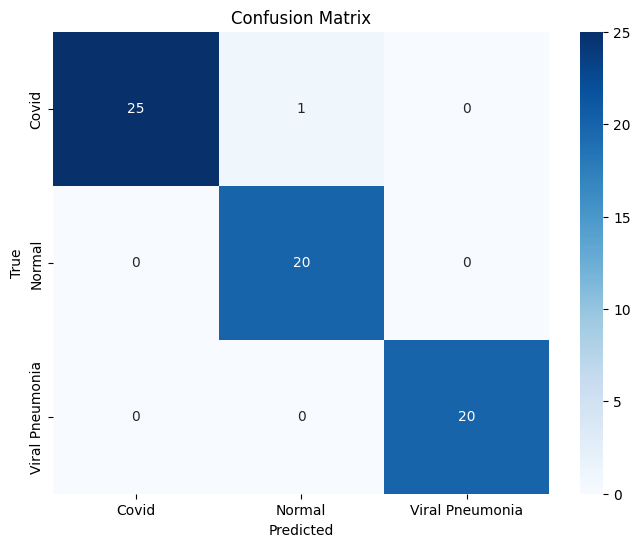

Classification Report:
                  precision    recall  f1-score   support

          Covid       1.00      0.96      0.98        26
         Normal       0.95      1.00      0.98        20
Viral Pneumonia       1.00      1.00      1.00        20

       accuracy                           0.98        66
      macro avg       0.98      0.99      0.99        66
   weighted avg       0.99      0.98      0.98        66



In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator for the test set
test_data_generator = ImageDataGenerator(rescale=1.0/255.0)  # Rescale pixel values

# Load the test data from the directories
test_data = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(500, 500),  # Adjust target size as needed
    batch_size=1,  # Set batch size to 1 to visualize individual predictions
    class_mode='categorical',
    shuffle=False  # Important to match predictions with true labels
)

# Get true labels
true_labels = test_data.classes

# Predict using your VGG16 model
predictions = model.predict(test_data)

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predictions.argmax(axis=1))

# Get class names (categories)
class_names = list(test_data.class_indices.keys())

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(true_labels, predictions.argmax(axis=1), target_names=class_names)
print("Classification Report:\n", report)

### ....... Finished .........